In [33]:
from MFDFA import MFDFA

import pyedflib
import glob as gl
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter
import mne
import plotly.graph_objects as go
import pandas as pd

In [34]:
def estetica(figura,x_name = '',y_name = '',title = '',w = 400,h = 325):
    
    figura.update_xaxes(showgrid=True,showline=True, linewidth=2, linecolor='black', mirror=True,title = x_name)#'cccccccccccccccc')
    figura.update_yaxes(showgrid=True,showline=True, linewidth=2, linecolor='black', mirror=True,title =y_name)


    figura.update_layout(
        xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
        yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
        margin=dict(l=20, r=20, t=40, b=20),
        plot_bgcolor="white",
        template="plotly_white", 
        title={
        'text': title,  # Título del gráfico
        'font': {'size': 24},  # Tamaño de fuente del título
        'pad': {'t': 100, 'b': 10, 'l': 50, 'r': 50}  # Márgenes del título
    },
        autosize=False,
        width=w,
        height=h,
        font= dict(family="Arial",size=18,color="Black"),
        #yaxis = dict(range=[0,1]),
        #xaxis = dict(range=[0,1]),
        title_font = dict(size =20),
        legend=dict(orientation = 'h',
                    font = dict(size = 15),
                     yanchor="top",
                     y=-0.2,
                     xanchor="left",
                     x=0.2,
                     bgcolor='rgba(255,255,255,0)',
                   )
    )
    
    

def filtroFIR(sig, fp = 0, fl=30):
    
    import mne
    import numpy as np
    sfreq = 256
    f_p = fp
    f_l = fl
    transition_band = 0.25 * f_p
    f_s = f_p + transition_band
    
    if f_l == 0:
        h = mne.filter.create_filter(sig, sfreq, l_freq=None, h_freq=f_p,
                                    fir_design='firwin2', verbose=True)  
    else:
         h = mne.filter.create_filter(sig, sfreq, l_freq=f_l, h_freq=f_p,
                                    fir_design='firwin2', verbose=True)
    sig_filtrada = np.convolve(h, sig)[len(h) // 2:]
    return sig_filtrada


def leer_con_protocolo_monopolar(sample_dir,fp,fl):
    import pyedflib 
    
    f = pyedflib.EdfReader(sample_dir )
    signal_labels = f.getSignalLabels()
    evento = np.zeros((3, f.getNSamples()[0]))
    n_canales = 21
    if fl== 0:
        sigbufs = np.zeros((22, f.getNSamples()[0]+113))
    else:
        sigbufs = np.zeros((22, f.getNSamples()[0]+3379))   
    
    for i in range(21):
        sigbufs[i, :] = filtroFIR(f.readSignal(i),fp,fl) #Fp1-F3
    evento[1, :] = f.readSignal(30)
    evento[2, :] = f.readSignal(31)

    return n_canales, signal_labels,evento, sigbufs


def Hv_a_df(signals, etiquetas):
    import pandas as pd
    import numpy as np
    
    
    df = pd.DataFrame()
    canal =0 
    for canal in range(20):
        df[etiquetas[canal]] = signals[canal]
      
    return df           
 

In [110]:
import glob as gl

ventana = 100
salto = 1
lag = np.unique(np.logspace(6, 10, 11, base = 2).astype(int))
q = 2
order = 1

fp = 30
fl = 0

Con = gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Epilepticos\*")
Sin =   gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Neurotipicos\*")

paciente = 1

n_canales, signal_labels, eventoC,Con_Epilepcia= leer_con_protocolo_monopolar(Con[paciente],fp,fl)
n_canales, signal_labels, eventoS, Sin_Epilepcia= leer_con_protocolo_monopolar(Sin[paciente],fp,fl)




In [111]:


df_Epilepticos = Hv_a_df(Con_Epilepcia,signal_labels)
df_Neurotipicos = Hv_a_df(Sin_Epilepcia,signal_labels)

corr_matrixE = df_Epilepticos.corr()
corr_matrixN = df_Neurotipicos.corr()

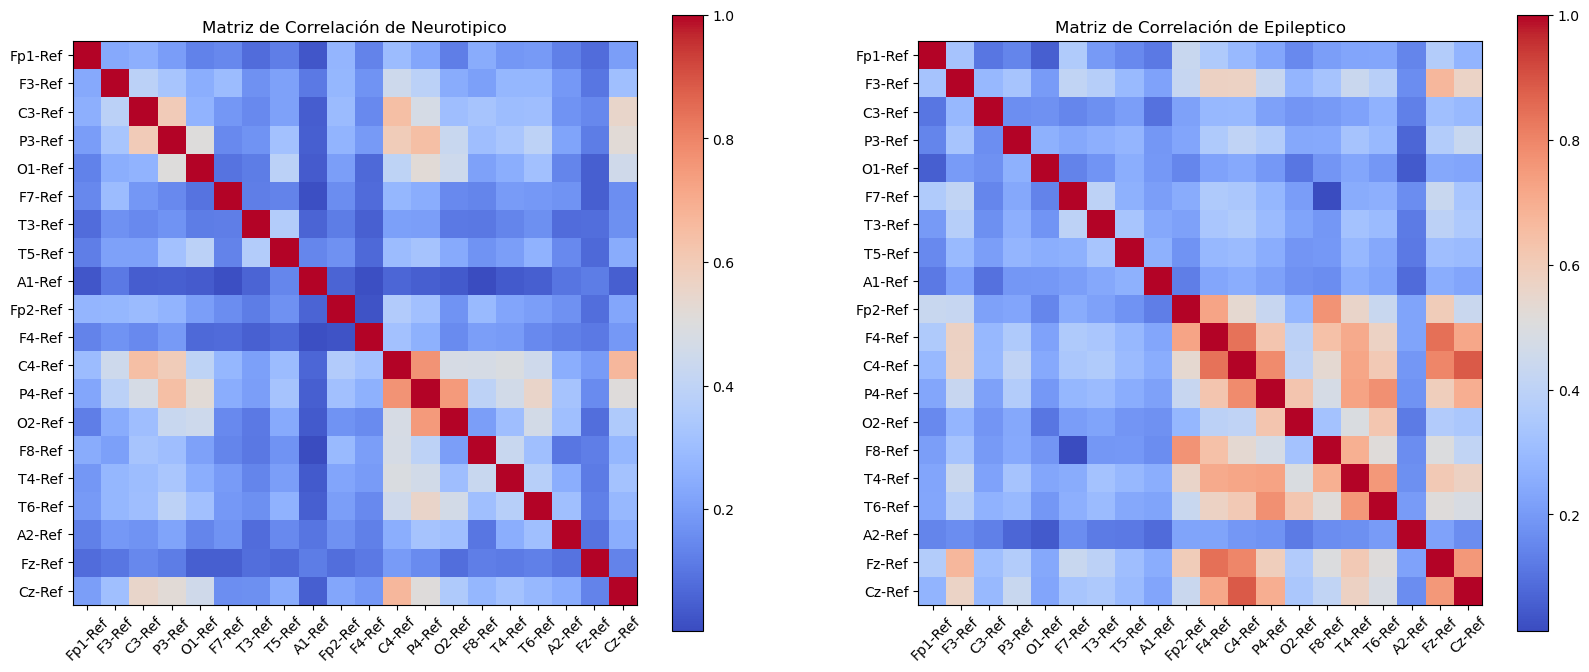

In [37]:




plt.figure(figsize=(20, 8))


plt.subplot(1,2,1)
plt.imshow(corr_matrixN, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns)
plt.title('Matriz de Correlación de Neurotipico')

plt.subplot(1,2,2)
plt.imshow(corr_matrixE, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns)
plt.title('Matriz de Correlación de Epileptico')

plt.show()




In [113]:
nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

df_Epilepticos = Hv_a_df(Con_Epilepcia,nodes)
df_Neurotipicos = Hv_a_df(Sin_Epilepcia,nodes)

corr_matrixE = df_Epilepticos.corr()
corr_matrixN = df_Neurotipicos.corr()

c:\Users\valen\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

c:\Users\valen\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



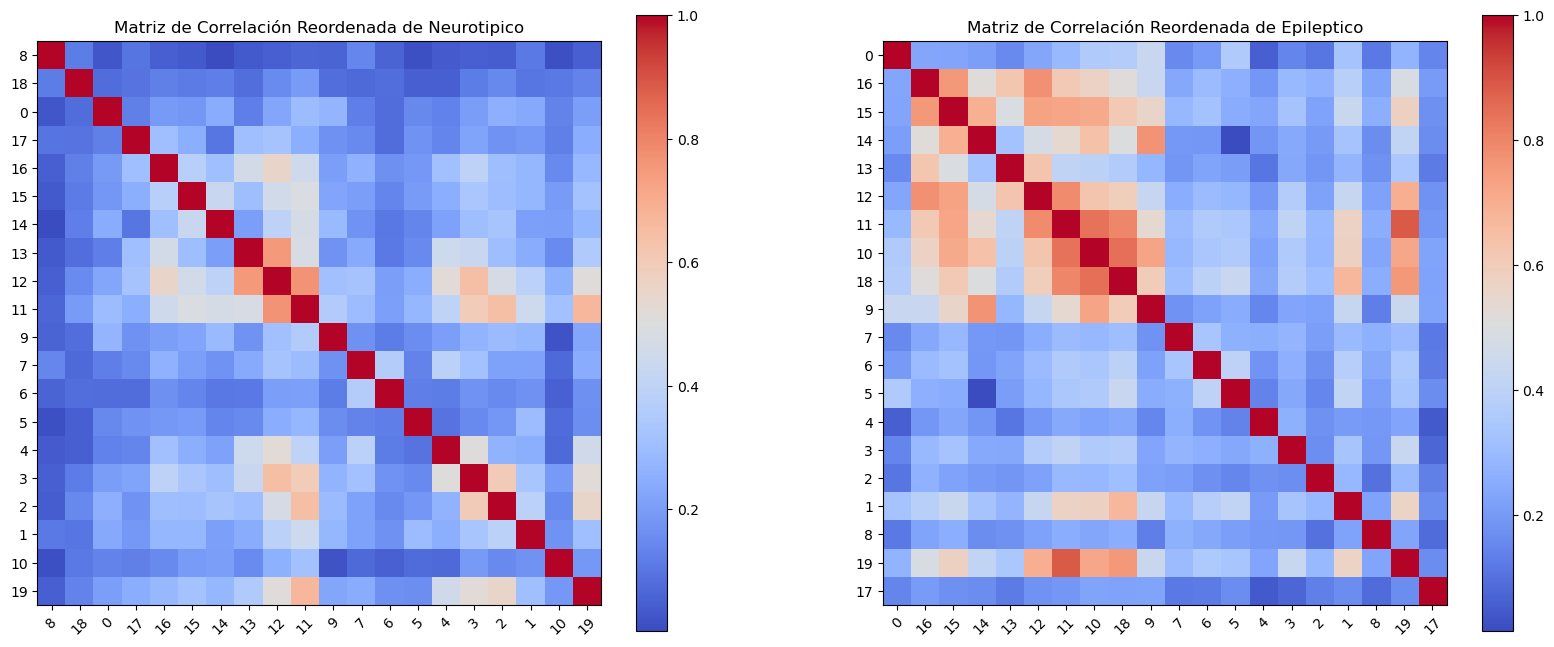

In [39]:
from scipy.spatial.distance import squareform
from sklearn.cluster import AgglomerativeClustering


distance_matrix = 1 - np.abs(corr_matrixE)
distance_vector = squareform(distance_matrix)
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)
cluster_indices = np.argsort(cluster_labels)
reordered_matrixE = corr_matrixE.iloc[cluster_indices, :]
reordered_matrixE= reordered_matrixE.iloc[:, cluster_indices]


distance_matrix = 1 - np.abs(corr_matrixN)
distance_vector = squareform(distance_matrix)
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)
cluster_indices = np.argsort(cluster_labels)
reordered_matrixN = corr_matrixN.iloc[cluster_indices, :]
reordered_matrixN= reordered_matrixN.iloc[:, cluster_indices]


plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(reordered_matrixN, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrixN.columns)), reordered_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrixN.columns)), reordered_matrixN.columns)
plt.title('Matriz de Correlación Reordenada de Neurotipico')


plt.subplot(1,2,2)
plt.imshow(reordered_matrixE, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrixE.columns)), reordered_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrixE.columns)), reordered_matrixE.columns)
plt.title('Matriz de Correlación Reordenada de Epileptico')

plt.show()




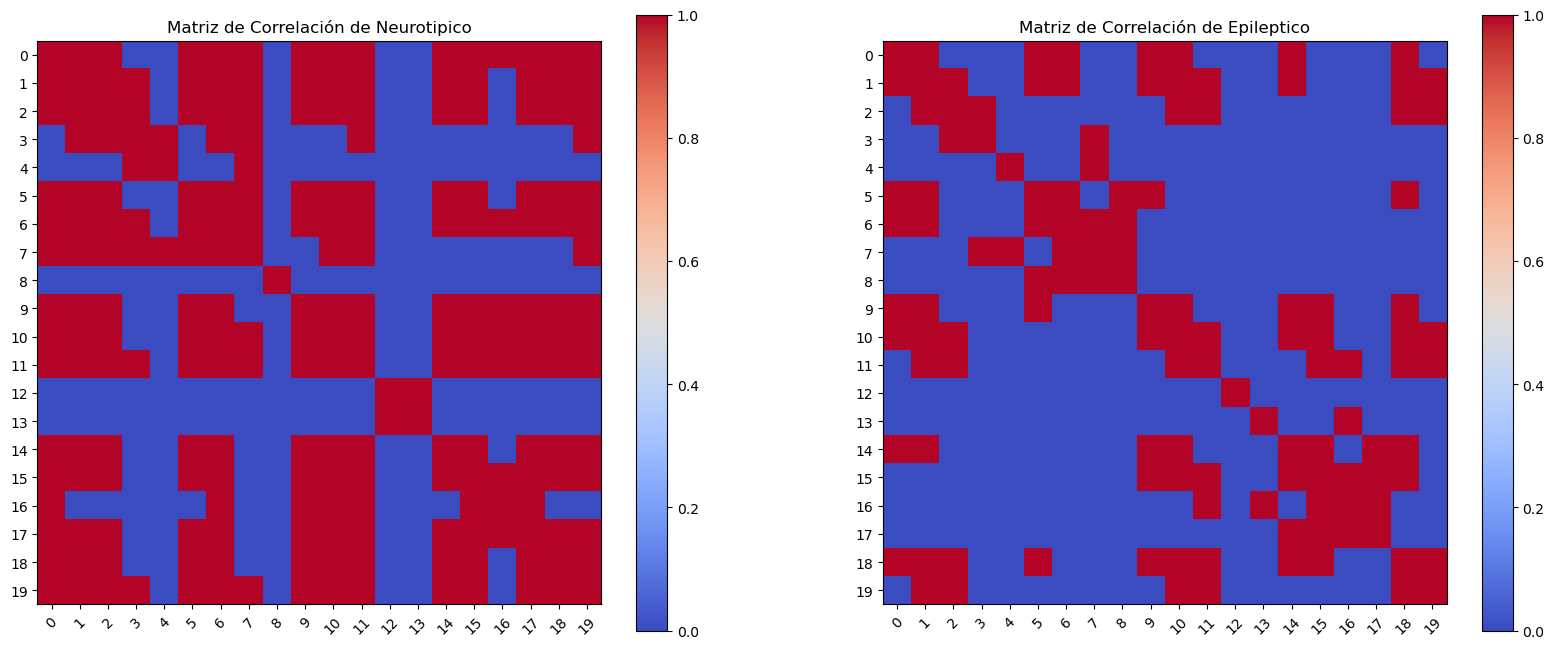

In [117]:
beta = 0.6
corr_matrixE_Binarizada = corr_matrixE.copy()


for i in range(len(corr_matrixE[:][1])):
    for j in range(len(corr_matrixE[1][:])):
        if corr_matrixE[i][j] > beta:
            corr_matrixE_Binarizada[i][j] = 1
        else:
            corr_matrixE_Binarizada[i][j] = 0
        
        

corr_matrixN_Binarizada = corr_matrixN.copy()


for i in range(len(corr_matrixN[:][1])):
    for j in range(len(corr_matrixE[1][:])):
        if corr_matrixN[i][j] > beta:
            corr_matrixN_Binarizada[i][j] = 1
        else:
            corr_matrixN_Binarizada[i][j] = 0
            


plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(corr_matrixN_Binarizada, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns)
plt.title('Matriz de Correlación de Neurotipico')


plt.subplot(1,2,2)
plt.imshow(corr_matrixE_Binarizada, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns)
plt.title('Matriz de Correlación de Epileptico')


plt.show()




In [41]:
corr_matrixN

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.235443,0.254552,0.200073,0.130957,0.144487,0.079451,0.123413,0.029448,0.275099,0.132995,0.296272,0.228029,0.122451,0.243301,0.184715,0.191728,0.126514,0.078383,0.202672
1,0.235443,1.000000,0.387813,0.333458,0.248361,0.298050,0.170050,0.212347,0.111598,0.276679,0.170644,0.446257,0.386991,0.241494,0.207595,0.276265,0.279017,0.189424,0.101284,0.306812
2,0.254552,0.387813,1.000000,0.595811,0.266375,0.184602,0.147703,0.210838,0.044578,0.294250,0.148619,0.644857,0.471435,0.304257,0.326747,0.300936,0.304995,0.172687,0.143485,0.549282
3,0.200073,0.333458,0.595811,1.000000,0.501755,0.148163,0.172807,0.317012,0.048029,0.269123,0.190892,0.594073,0.644875,0.429439,0.306071,0.334618,0.393957,0.220748,0.119378,0.517158
4,0.130957,0.248361,0.266375,0.501755,1.000000,0.095410,0.116938,0.386444,0.040126,0.203180,0.072452,0.398660,0.517901,0.445429,0.213153,0.251532,0.312519,0.136180,0.046470,0.453810
5,0.144487,0.298050,0.184602,0.148163,0.095410,1.000000,0.121877,0.133487,0.012599,0.156389,0.076378,0.279057,0.245512,0.149754,0.137018,0.193928,0.189804,0.171947,0.048031,0.158993
6,0.079451,0.170050,0.147703,0.172807,0.116938,0.121877,1.000000,0.361760,0.059718,0.116665,0.052335,0.208203,0.203925,0.108759,0.104379,0.136572,0.163355,0.079398,0.082433,0.163018
7,0.123413,0.212347,0.210838,0.317012,0.386444,0.133487,0.361760,1.000000,0.141943,0.168349,0.070167,0.297820,0.325244,0.239490,0.170683,0.203320,0.261368,0.150541,0.071542,0.243247
8,0.029448,0.111598,0.044578,0.048029,0.040126,0.012599,0.059718,0.141943,1.000000,0.058591,0.010758,0.061736,0.047153,0.034493,0.002866,0.036551,0.046667,0.098583,0.118251,0.047924
9,0.275099,0.276679,0.294250,0.269123,0.203180,0.156389,0.116665,0.168349,0.058591,1.000000,0.019590,0.358056,0.311028,0.171671,0.288924,0.223931,0.203001,0.169721,0.082985,0.225982


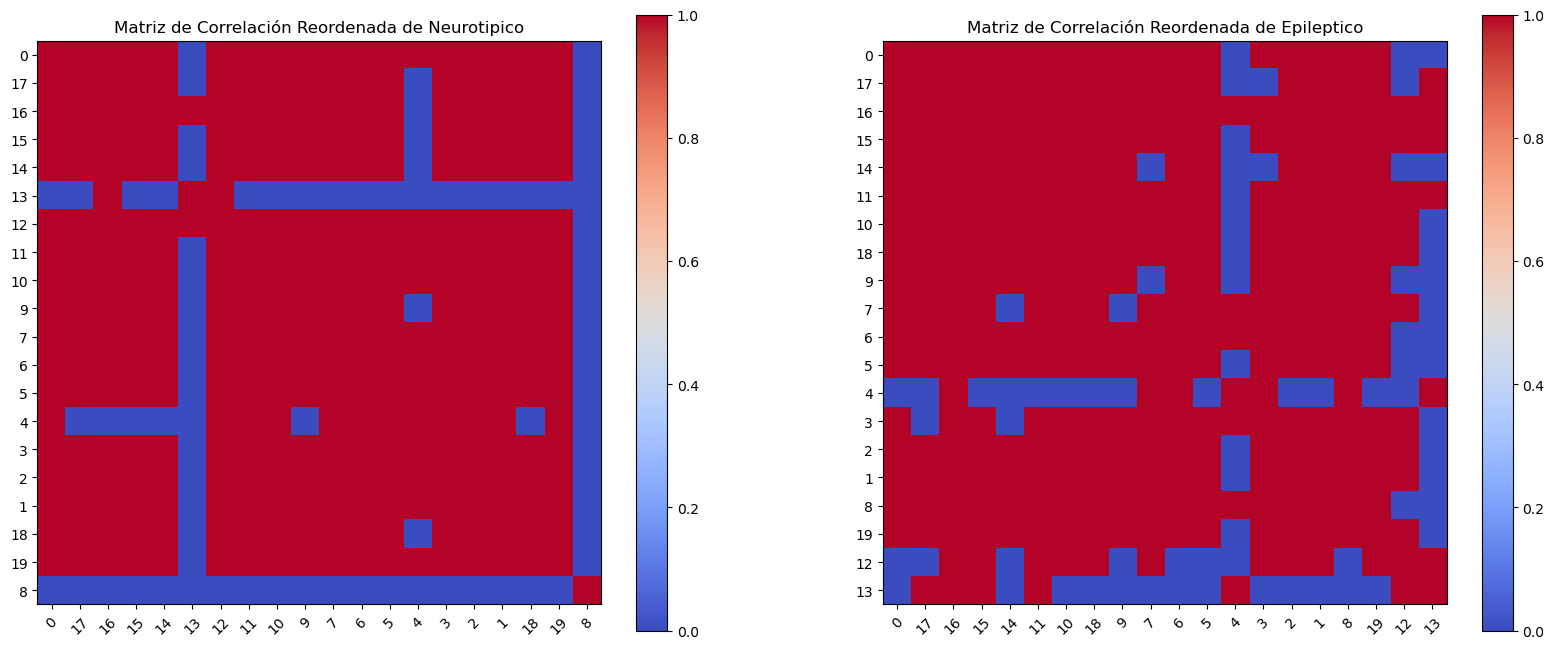

In [76]:


distance_matrix = 1 - np.abs(corr_matrixE_Binarizada)
distance_vector = squareform(distance_matrix)
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)
cluster_indices = np.argsort(cluster_labels)
reordered_matrixE = corr_matrixE_Binarizada.iloc[cluster_indices, :]
reordered_matrixE= reordered_matrixE.iloc[:, cluster_indices]


distance_matrix = 1 - np.abs(corr_matrixN_Binarizada)
distance_vector = squareform(distance_matrix)
n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
cluster_labels = clustering.fit_predict(distance_matrix)
cluster_indices = np.argsort(cluster_labels)
reordered_matrixN = corr_matrixN_Binarizada.iloc[cluster_indices, :]
reordered_matrixN= reordered_matrixN.iloc[:, cluster_indices]


plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.imshow(reordered_matrixN, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrixN.columns)), reordered_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrixN.columns)), reordered_matrixN.columns)
plt.title('Matriz de Correlación Reordenada de Neurotipico')


plt.subplot(1,2,2)
plt.imshow(reordered_matrixE, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(reordered_matrixE.columns)), reordered_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(reordered_matrixE.columns)), reordered_matrixE.columns)
plt.title('Matriz de Correlación Reordenada de Epileptico')

plt.show()

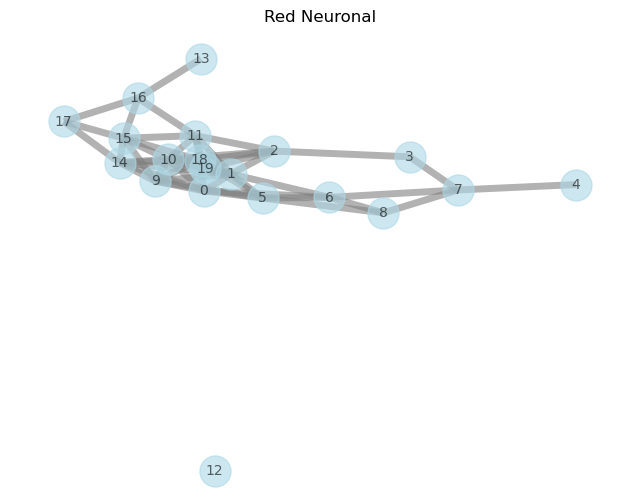

In [92]:
import pandas as pd
import numpy as np
import networkx as nx

graph = nx.Graph()


for node in corr_matrixE_Binarizada.columns:
    graph.add_node(node)
    
for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
        if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
            graph.add_edge(node1, node2)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, with_labels=True, node_size=500, node_color='lightblue',
                 font_size=10, font_color='black', edge_color='gray', width=5, alpha=0.6)
labels = nx.get_edge_attributes(graph, 'weight')

plt.title('Red Neuronal')
plt.axis('off')
plt.show()


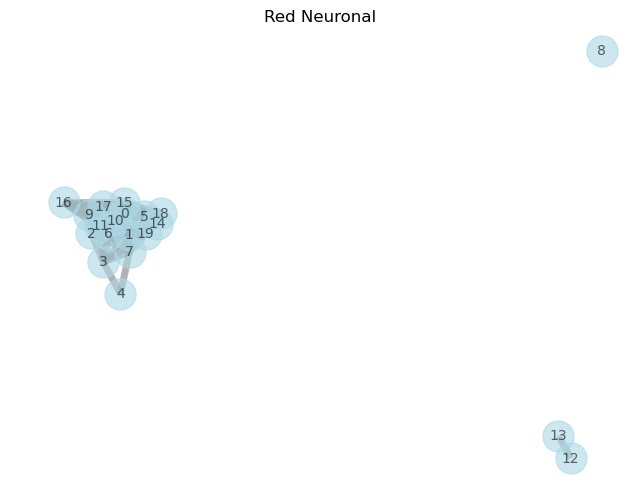

In [118]:
import pandas as pd
import numpy as np
import networkx as nx

graphSolo = nx.Graph()


for node in corr_matrixN_Binarizada.columns:
    graphSolo.add_node(node)
    
for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
        if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
            graphSolo.add_edge(node1, node2)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graphSolo)
nx.draw_networkx(graphSolo, pos, with_labels=True, node_size=500, node_color='lightblue',
                 font_size=10, font_color='black', edge_color='gray', width=5, alpha=0.6)
labels = nx.get_edge_attributes(graphSolo, 'weight')

plt.title('Red Neuronal')
plt.axis('off')
plt.show()


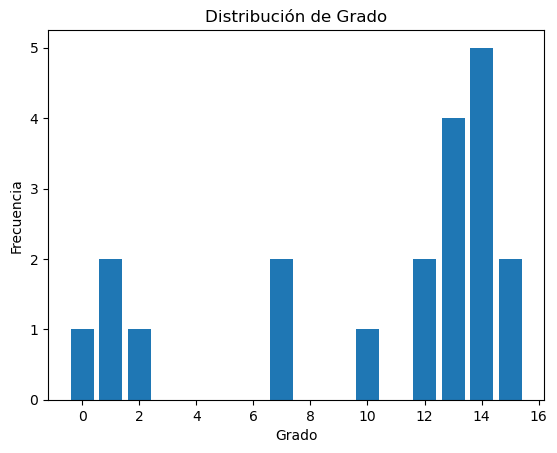

In [120]:

degree_sequence = [graph.degree(node) for node in graphSolo.nodes()]

degree_counts = nx.degree_histogram(graphSolo)


x = range(len(degree_counts))

plt.bar(x, degree_counts)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Distribución de Grado')
plt.show()

# Variar la distribucion de grado
# Coficienciente de clustering
# Longitud de camino mas corto
# Longitud de la red
# Grado Promedio


In [78]:

import sys



ventana = 100
salto = 1
lag = np.unique(np.logspace(6, 10, 11, base = 2).astype(int))
q = 2
order = 1
matricesN = []
matricesE = []
beta = 0.6
fp = 30
fl = 0



Con = gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Epilepticos\*")
Sin =   gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Neurotipicos\*")

for t in range(6):
    paciente = t

    n_canales, signal_labels, eventoC,Con_Epilepcia= leer_con_protocolo_monopolar(Con[paciente],fp,fl)
    n_canales, signal_labels, eventoS, Sin_Epilepcia= leer_con_protocolo_monopolar(Sin[paciente],fp,fl)

    nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

    df_Epilepticos = Hv_a_df(Con_Epilepcia,nodes)
    df_Neurotipicos = Hv_a_df(Sin_Epilepcia,nodes)

    corr_matrixE = df_Epilepticos.corr()
    corr_matrixN = df_Neurotipicos.corr()

 
    corr_matrixE_Binarizada = corr_matrixE.copy()


    for i in range(len(corr_matrixE[:][1])):
        for j in range(len(corr_matrixE[1][:])):
            if corr_matrixE[i][j] > beta:
                corr_matrixE_Binarizada[i][j] = 1
            else:
                corr_matrixE_Binarizada[i][j] = 0
            
            
        

    corr_matrixN_Binarizada = corr_matrixN.copy()


    for i in range(len(corr_matrixN[:][1])):
        for j in range(len(corr_matrixE[1][:])):
            if corr_matrixN[i][j] > beta:
                corr_matrixN_Binarizada[i][j] = 1
            else:
                corr_matrixN_Binarizada[i][j] = 0
                
                
    distance_matrix = 1 - np.abs(corr_matrixE_Binarizada)
    distance_vector = squareform(distance_matrix)
    n_clusters = 2
    clustering = AgglomerativeClustering(n_clusters=n_clusters,metric='precomputed', linkage='average')
    cluster_labels = clustering.fit_predict(distance_matrix)
    cluster_indices = np.argsort(cluster_labels)
    reordered_matrixE = corr_matrixE_Binarizada.iloc[cluster_indices, :]
    reordered_matrixE= reordered_matrixE.iloc[:, cluster_indices]


    distance_matrix = 1 - np.abs(corr_matrixN_Binarizada)
    distance_vector = squareform(distance_matrix)
    n_clusters = 2
    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
    cluster_labels = clustering.fit_predict(distance_matrix)
    cluster_indices = np.argsort(cluster_labels)
    reordered_matrixN = corr_matrixN_Binarizada.iloc[cluster_indices, :]
    reordered_matrixN= reordered_matrixN.iloc[:, cluster_indices]

    matricesN.append(corr_matrixN_Binarizada)
    matricesE.append(corr_matrixE_Binarizada)
    
    sys.stdout = sys.__stdout__

            

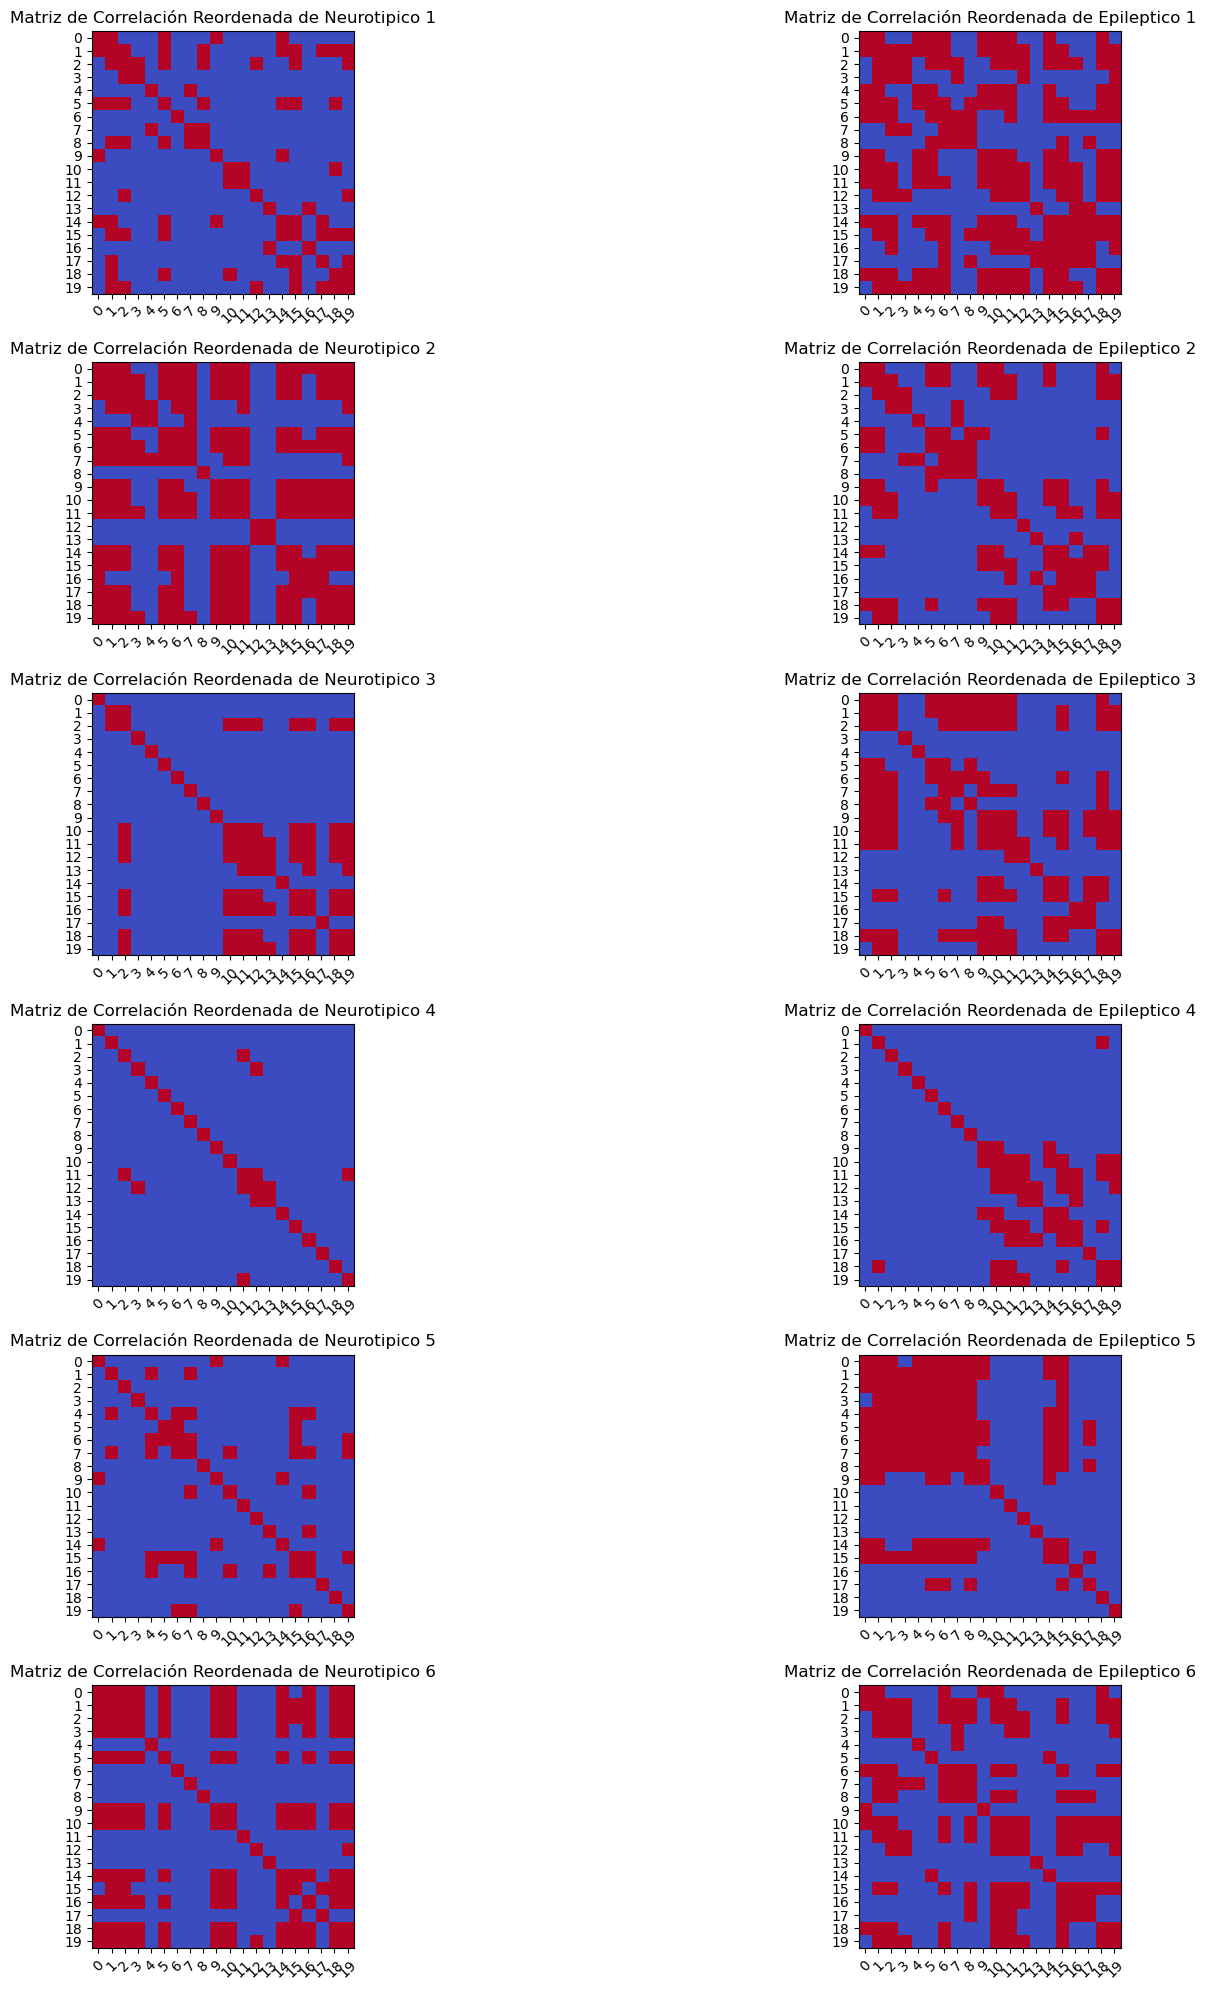

In [79]:
num_plots = len(matricesN)

fig, axes = plt.subplots(num_plots, 2, figsize=(20, 20))

for i in range(num_plots):

    ax1 = axes[i, 0]
    ax1.imshow(matricesN[i], cmap='coolwarm', interpolation='nearest')
    ax1.set_xticks(np.arange(len(matricesN[i].columns)))
    ax1.set_xticklabels(matricesN[i].columns, rotation=45)
    ax1.set_yticks(np.arange(len(matricesN[i].columns)))
    ax1.set_yticklabels(matricesN[i].columns)
    ax1.set_title(f'Matriz de Correlación Reordenada de Neurotipico {i+1}')

    ax2 = axes[i, 1]
    ax2.imshow(matricesE[i], cmap='coolwarm', interpolation='nearest')
    ax2.set_xticks(np.arange(len(matricesE[i].columns)))
    ax2.set_xticklabels(matricesE[i].columns, rotation=45)
    ax2.set_yticks(np.arange(len(matricesE[i].columns)))
    ax2.set_yticklabels(matricesE[i].columns)
    ax2.set_title(f'Matriz de Correlación Reordenada de Epileptico {i+1}')


plt.tight_layout()
plt.show()

In [151]:
betaArray = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


matricesN = []
matricesE = []

matrices_BetaN = []
matrices_BetaE = []

ventana = 100
salto = 1
lag = np.unique(np.logspace(6, 10, 11, base = 2).astype(int))
q = 2
order = 1
i = 0
beta = 0.6
fp = 30
fl = 0


Con = gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Epilepticos\*")
Sin =   gl.glob(r"C:\Users\valen\OneDrive\Escritorio\Universidad\NeuFiSur\EEGs\Neurotipicos\*")

for t in range(6):
    for K in range(len(betaArray)):
        
        beta = betaArray[K]
        paciente = t

        n_canales, signal_labels, eventoC,Con_Epilepcia= leer_con_protocolo_monopolar(Con[paciente],fp,fl)
        n_canales, signal_labels, eventoS, Sin_Epilepcia= leer_con_protocolo_monopolar(Sin[paciente],fp,fl)



        nodes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

        df_Epilepticos = Hv_a_df(Con_Epilepcia,nodes)
        df_Neurotipicos = Hv_a_df(Sin_Epilepcia,nodes)

        corr_matrixE = df_Epilepticos.corr()
        corr_matrixN = df_Neurotipicos.corr()

    
        corr_matrixE_Binarizada = corr_matrixE.copy()


        for i in range(len(corr_matrixE[:][1])):
            for j in range(len(corr_matrixE[1][:])):
                if corr_matrixE[i][j] > beta:
                    corr_matrixE_Binarizada[i][j] = 1
                else:
                    corr_matrixE_Binarizada[i][j] = 0
                
                
            

        corr_matrixN_Binarizada = corr_matrixN.copy()


        for i in range(len(corr_matrixN[:][1])):
            for j in range(len(corr_matrixE[1][:])):
                if corr_matrixN[i][j] > beta:
                    corr_matrixN_Binarizada[i][j] = 1
                else:
                    corr_matrixN_Binarizada[i][j] = 0
            
        matrices_BetaN.append(corr_matrixN_Binarizada)
        matrices_BetaE.append(corr_matrixE_Binarizada)
       
        sys.stdout = sys.__stdout__
        
    matricesN.append(matrices_BetaN)
    matricesE.append(matrices_BetaE)
    matrices_BetaE = []
    matrices_BetaN = []

In [ ]:
Con

['C:\\Users\\valen\\OneDrive\\Escritorio\\Universidad\\NeuFiSur\\EEGs\\Epilepticos\\cacciali francisco.EDF',
 'C:\\Users\\valen\\OneDrive\\Escritorio\\Universidad\\NeuFiSur\\EEGs\\Epilepticos\\Herrero jeremias1.EDF',
 'C:\\Users\\valen\\OneDrive\\Escritorio\\Universidad\\NeuFiSur\\EEGs\\Epilepticos\\Larriaga Benjamin.EDF',
 'C:\\Users\\valen\\OneDrive\\Escritorio\\Universidad\\NeuFiSur\\EEGs\\Epilepticos\\luna torelli timoteo.EDF',
 'C:\\Users\\valen\\OneDrive\\Escritorio\\Universidad\\NeuFiSur\\EEGs\\Epilepticos\\puron bautista.EDF',
 'C:\\Users\\valen\\OneDrive\\Escritorio\\Universidad\\NeuFiSur\\EEGs\\Epilepticos\\vidal regina.EDF']

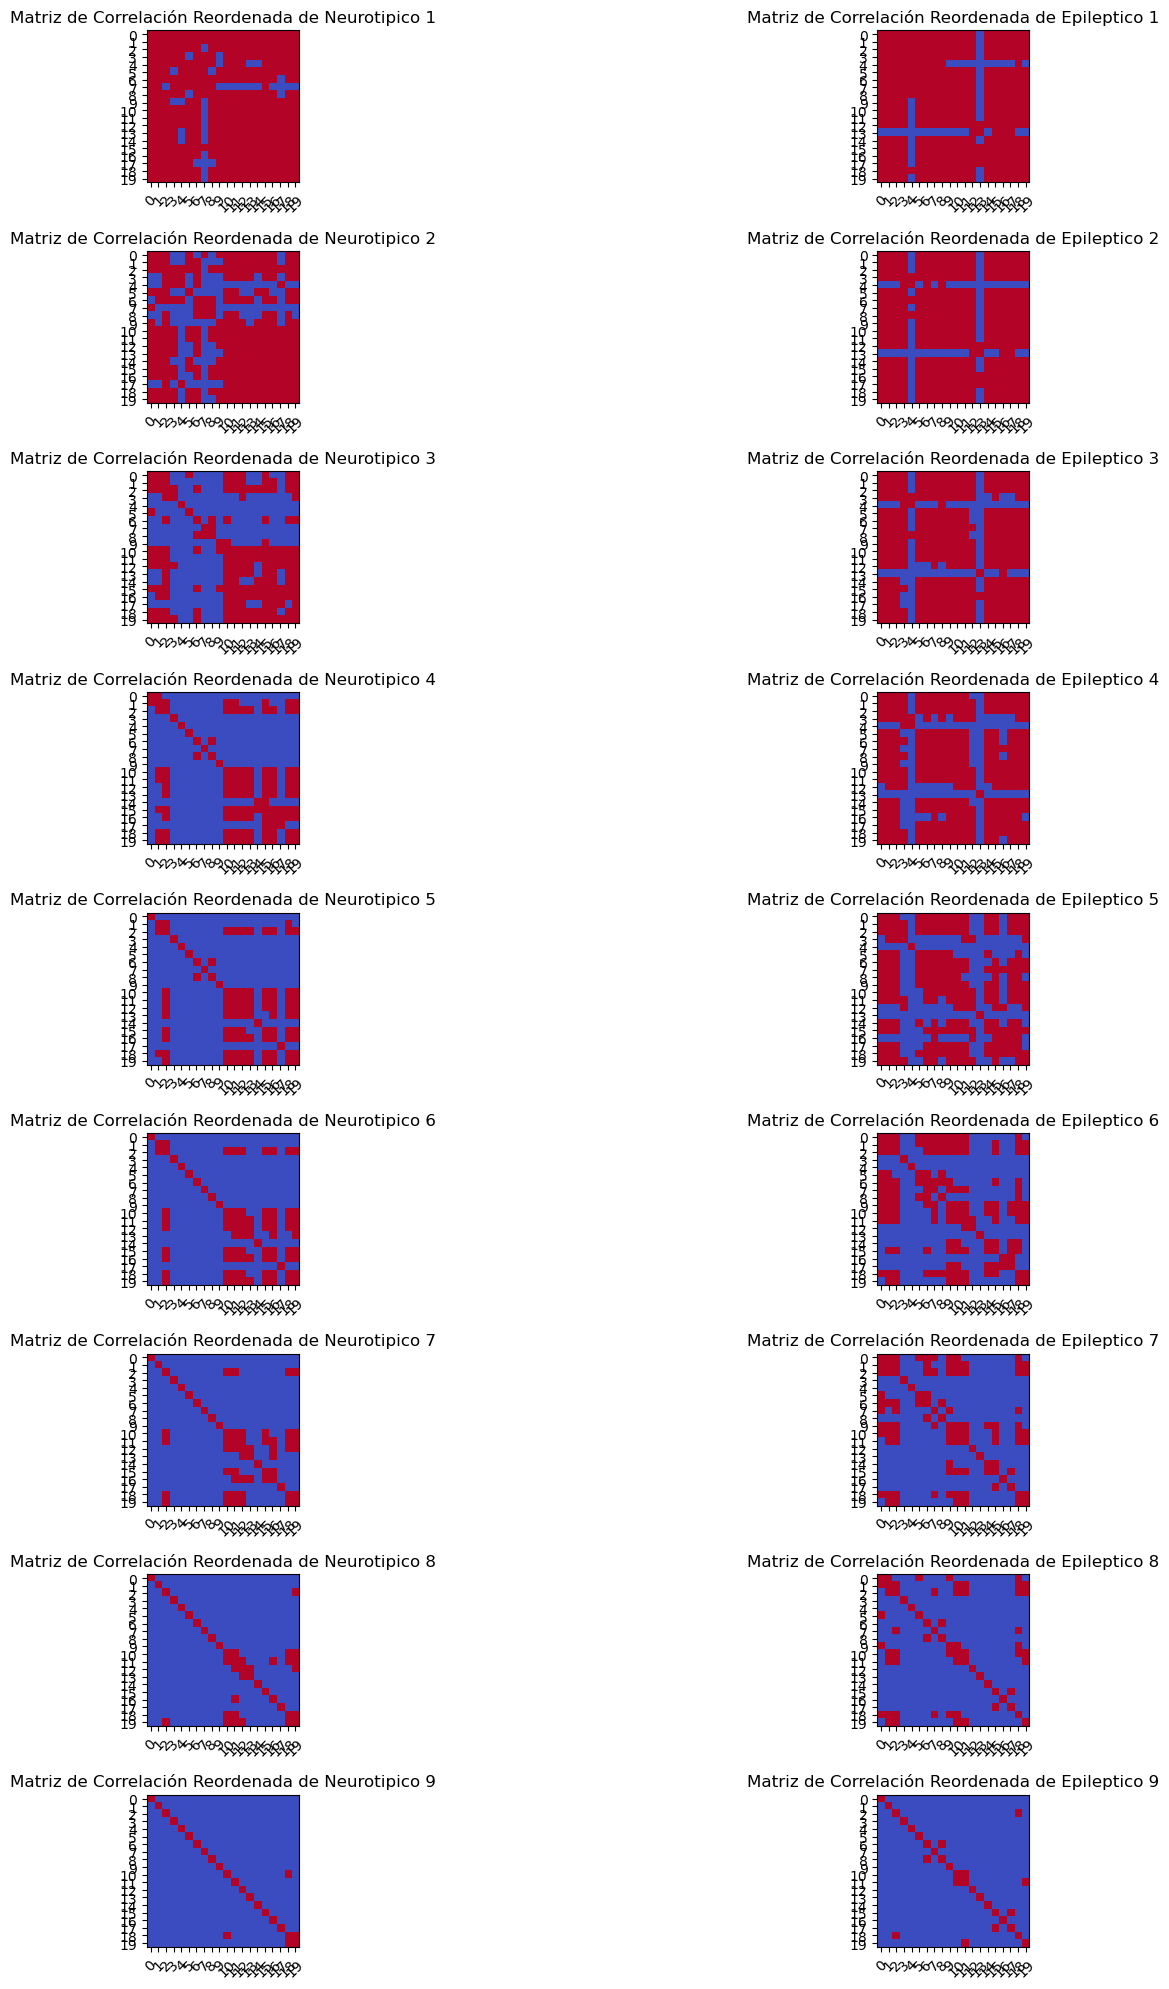

In [193]:
paciente = 2
fig, axes = plt.subplots(9, 2, figsize=(20, 20))
for i in range(len(betaArray)):

    ax1 = axes[i, 0]
    ax1.imshow(matricesN[paciente][i], cmap='coolwarm', interpolation='nearest')
    ax1.set_xticks(np.arange(len(matricesN[0][i].columns)))
    ax1.set_xticklabels(matricesN[paciente][i].columns, rotation=45)
    ax1.set_yticks(np.arange(len(matricesN[0][i].columns)))
    ax1.set_yticklabels(matricesN[paciente][i].columns)
    ax1.set_title(f'Matriz de Correlación Reordenada de Neurotipico {i+1}')

    ax2 = axes[i, 1]
    ax2.imshow(matricesE[paciente][i], cmap='coolwarm', interpolation='nearest')
    ax2.set_xticks(np.arange(len(matricesE[0][i].columns)))
    ax2.set_xticklabels(matricesE[paciente][i].columns, rotation=45)
    ax2.set_yticks(np.arange(len(matricesE[0][i].columns)))
    ax2.set_yticklabels(matricesE[paciente][i].columns)
    ax2.set_title(f'Matriz de Correlación Reordenada de Epileptico {i+1}')


plt.tight_layout()
plt.show()

In [192]:

paciente = 2


for g in range(len(betaArray)):
    
    graphN = nx.Graph()
    graphE = nx.Graph()
    
    corr_matrixN_Binarizada = matricesN[paciente][g]

    for node in corr_matrixN_Binarizada.columns:
        graphN.add_node(node)
        
    for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
        for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
            if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
                graphN.add_edge(node1, node2)
      
                

    corr_matrixE_Binarizada = matricesE[paciente][g]

    for node in corr_matrixE_Binarizada.columns:
        graphE.add_node(node)
        
    for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
        for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
            if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
                graphE.add_edge(node1, node2)


    plt.figure(figsize=(8, 6))


    degree_sequenceN = [graphN.degree(node) for node in graphN.nodes()]

    degree_countsN = np.array(nx.degree_histogram(graphN))
    degree_countsE = np.array(nx.degree_histogram(graphE))

    x = range(len(degree_countsN))

    hist = go.Figure()
    hist.add_trace(go.Bar(x=list(range(len(degree_countsN))), y=degree_countsN, name= 'Neurotipicos', marker=dict(color='blue')))
    hist.add_trace(go.Bar(x=list(range(len(degree_countsE))), y=degree_countsE, name= 'Epilepticos',  marker=dict(color='red') ))

    estetica(hist,title = f'Distribucion de grado para Beta = {betaArray[g]}', h=300,w=700)
    hist.show()
    


    

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [190]:

for g in range(len(betaArray)):
    hist = go.Figure()
    for paciente in range(5):    
        
        graphN = nx.Graph()
        graphE = nx.Graph()
        
        corr_matrixN_Binarizada = matricesN[paciente][g]

        for node in corr_matrixN_Binarizada.columns:
            graphN.add_node(node)
            
        for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
            for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
                if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
                    graphN.add_edge(node1, node2)
        
                    

        corr_matrixE_Binarizada = matricesE[paciente][g]

        for node in corr_matrixE_Binarizada.columns:
            graphE.add_node(node)
            
        for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
            for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
                if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
                    graphE.add_edge(node1, node2)


        plt.figure(figsize=(8, 6))


        degree_sequenceN = [graphN.degree(node) for node in graphN.nodes()]

        degree_countsN = np.array(nx.degree_histogram(graphN))
        degree_countsE = np.array(nx.degree_histogram(graphE))

        x = range(len(degree_countsN))

        
        hist.add_trace(go.Bar(x=list(range(len(degree_countsN))), y=degree_countsN, name= 'Neurotipicos', marker=dict(color='blue',line=dict(width=0.2))))
        hist.add_trace(go.Bar(x=list(range(len(degree_countsE))), y=degree_countsE, name= 'Epilepticos',  marker=dict(color='red',line=dict(width=0.2)) ))
        hist.update_layout(showlegend=False)
    estetica(hist,title = f'Distribucion de grado para Beta = {betaArray[g]}', h=300,w=700)
    hist.show()



    

C:\Users\valen\AppData\Local\Temp\ipykernel_34784\3823701601.py:31: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Matriz de Correlación Reordenada de Neurotipico')

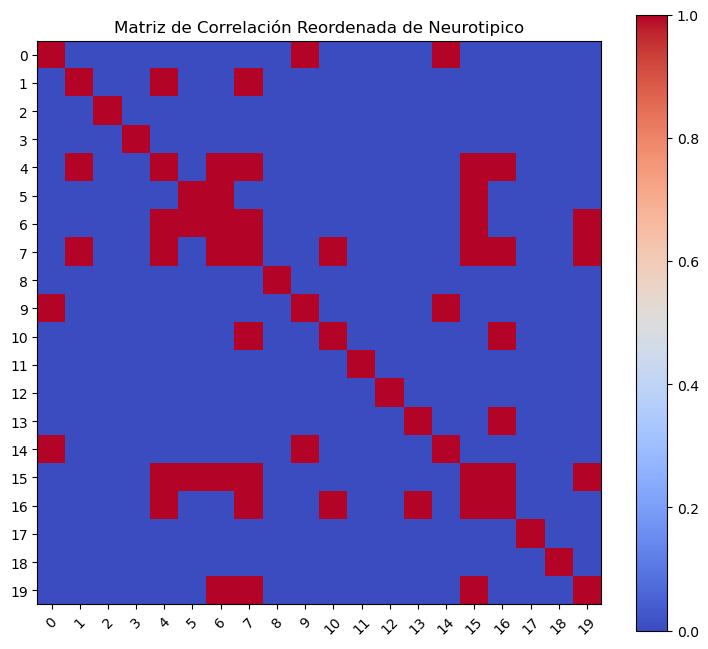

In [ ]:
plt.figure(figsize=(20, 8))
i=4
plt.subplot(1,2,1)
plt.imshow(matricesN[i][5], cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(matricesE[i][5].columns)), matricesE[0][5].columns, rotation=45)
plt.yticks(np.arange(len(matricesE[i][5].columns)), matricesE[0][5].columns)
plt.title('Matriz de Correlación Reordenada de Neurotipico')

In [ ]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

df = pd.DataFrame(dict(
X = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'],
P = [160000,    180000,    240000,  140000,  180000, 150000,125000, 160000,    125000,     110000,    125000,    140000],
S = [160000, 180000, 240000,140000,180000, 160000, 135000, 200000, 165000, 140000, 150000, 175000]

))

fig = go.Figure()

fig.add_scatter(x=df['X'], y=df['P'], name='Ticket Volume Received', mode='lines+markers', line=dict(width=3),marker=dict(symbol='diamond',size=10))
fig.add_scatter(x=df['X'], y=df['S'], name='Ticket Volume Processed', mode='lines+markers',line=dict(width=3),marker=dict(symbol='square',size=10) )


estetica(fig, h=450,w=800)
fig.show()

In [157]:
paciente = 0

beta = 0
graphSoloN = nx.Graph()


corr_matrixN_Binarizada = matricesN[paciente][beta]

for node in corr_matrixN_Binarizada.columns:
    graphSoloN.add_node(node)
    
for i, node1 in enumerate(corr_matrixN_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixN_Binarizada.columns):
        if i != j and corr_matrixN_Binarizada[i][j] == 1.0:
            graphSoloN.add_edge(node1, node2)
            

degree_countsN = nx.degree_histogram(graphSoloN)


graphSoloE = nx.Graph()
corr_matrixE_Binarizada = matricesE[paciente][beta]

for node in corr_matrixE_Binarizada.columns:
    graphSoloE.add_node(node)
    
for i, node1 in enumerate(corr_matrixE_Binarizada.columns):
    for j, node2 in enumerate(corr_matrixE_Binarizada.columns):
        if i != j and corr_matrixE_Binarizada[i][j] == 1.0:
            graphSoloE.add_edge(node1, node2)
            
           


degree_countsE = nx.degree_histogram(graphSoloE)




hist = go.Figure()
hist.add_trace(go.Bar(x=list(range(len(degree_countsN))), y=degree_countsN, name= 'Neurotipicos'))
hist.add_trace(go.Bar(x=list(range(len(degree_countsE))), y=degree_countsE, name= 'Epilepticos' ))

estetica(hist,title = f'Distribucion de grado para Beta = {betaArray[g]}', h=300,w=700)
hist.show()
         

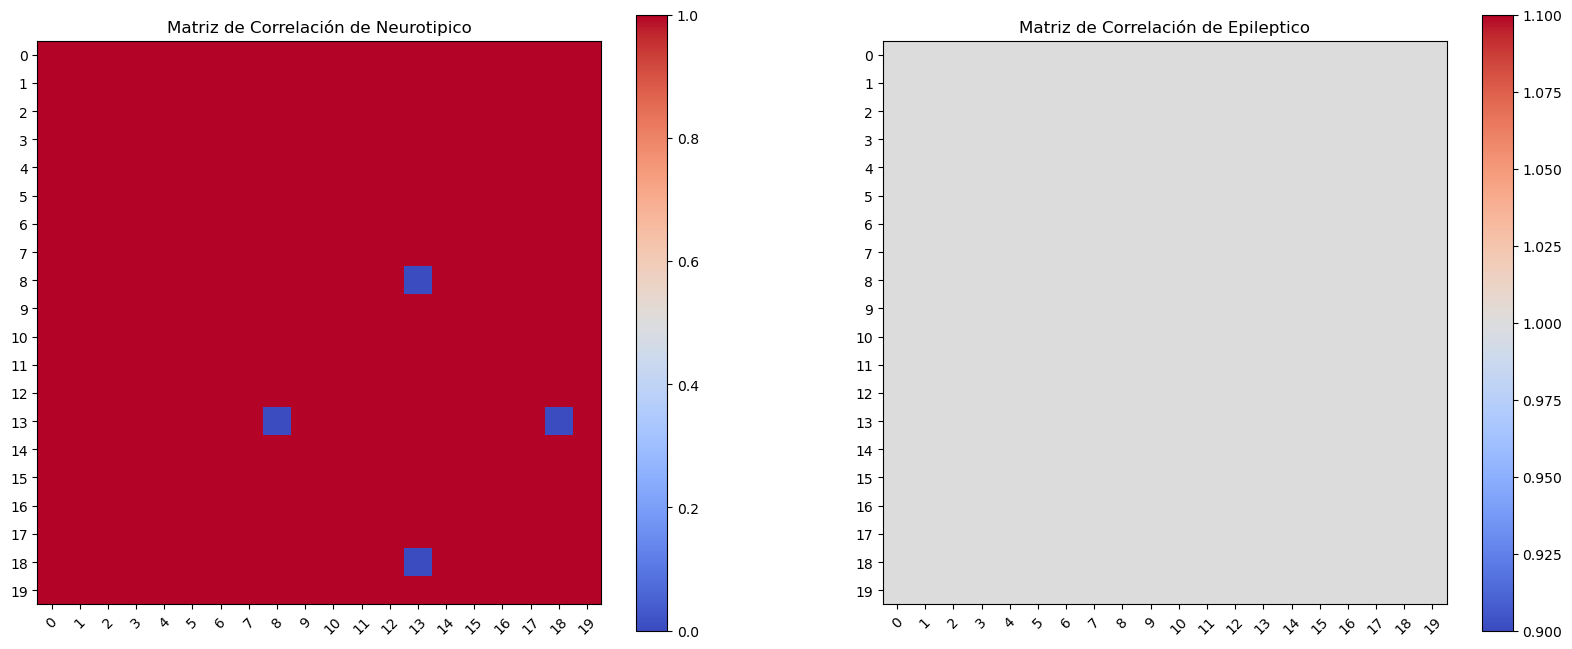

In [149]:

plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow( matricesN[paciente][beta], cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixN.columns)), corr_matrixN.columns)
plt.title('Matriz de Correlación de Neurotipico')


plt.subplot(1,2,2)
plt.imshow( matricesE[paciente][beta], cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrixE.columns)), corr_matrixE.columns)
plt.title('Matriz de Correlación de Epileptico')


plt.show()
